# 시나리오
- 매주 7개의 생선 중 일부를 무작위로 골라 머신러닝 모델을 학습할 수 있도록 훈련 데이터를 제공하고 있음
- 수산물 공급처가 많아 샘플을 고르기가 어려움
- 새로 추가되는 수산물의 경우 훈련 데이터 샘플이 없음
- 영업팀에서 새로운 생선이 추가되면 즉시 훈련데이터를 제공하겠다고 함

### 문제
- 새로 추가되는 생선이 언제 올지 모름
- 새로운 생선이 올때마다 훈련데이터가 추가됨
- 새로운 생선에 대한 추가 학습을 위해 어떻게 할 수 있을까?
    - 매일 새로 추가되는 데이터를 기존 훈련 데이터에 추가하여 모델을 학습하는 방법
        - 시간이 지날수록 데이터가 많아짐(저장용량 증가)
    - 새로운 데이터가 들어오면 이전 데이터를 제거하여 모델을 학습하는 방법
        - 다른 데이터에 없는 중요 데이터 손실 위험
        - 분류되던 생선이 분류가 되지 않을 수 있음
        
## 점진적 학습(온라인 학습)        
- 기존 데이터로 훈련된 모델에 새로운 데이터만 추가로 훈련하는 방식 가능
- 대표적인 점진적 학습 알고리즘으로 <b>확률적 경사 하강법</b>
- 사이킷런에서도 확률적 경사 하강법의 클래스 제공

### 확률적 경사 하강법(Stochasrtic Gradiant Descent)
- 목표지점을 찾기위해 랜덤하게 경사를 따라 내려가는 방법
#### 확률적
- 무작위, 랜덤하게
#### 경사
- 기울기
#### 하강법
- 내려가는 방법

#### 과정
- 1) 훈련 세트에서 랜덤한 샘플을 고름
- 2) 경사를 조금 내려감
- 3) 1)을 반복 하여 전체 샘플을 모두 사용할 때까지 반복
- 4) 샘플을 모두 사용했다면 1에포크(epoch)
- 5) 경사를 다 내려오지 못했다면 1)부터 다시 진행
- 보통 1) ~ 4)를 수십~수백번 에포크를 진행

#### 미니배치(minibatch) 경사 하강법
- 무작위로 여러 개의 샘플을 사용

#### 배치(batch) 경사 하강법
- 전체 샘플 사용(자원 소모 높음)

### 경사하강법의 적용 대상
- 손실함수의 값을 이용하여 진행

#### 손실함수(비용함수)로 만들어진 그래프에서 기울기가 최소인 지점을 찾는 것
- 평균 제곱 오차(MSE) - 회귀에서 사용
- 로지스틱 손실 함수(이진 크로스엔트로피 손실함수) - 분류에서 사용
- 크로스 엔트로피 손실함수 - 다중 분류에서 사용

### 손실 함수(loss function)
- 회귀에서 손실은 평균 오차의 합을 기반으로 판단
- 분류에서 손실은 정답을 못 맞추는 것으로 판단
    - 정확도를 이용하는 경우 경사하강법에 알맞지 않음(경사는 아주 조금씩 내려와야 함)
    
#### 로지스틱 손실 함수 개념 예시
- 양성 클래스(타겟=1)일 때 손실은 -log(예측확률)로 계산
- 음성 클래스(타겟=0)일 때 손실은 -log(1-예측확률)로 계산
- 예측 확률이 0에서 멀수록 손실은 아주 큰 양수가 됨

# 경사 하강법은 최적화 알고리즘 중 하나로, 손실함수(Loss Function)의 값을 최소화 하는 파라미터[가중치(weight)와 편향(bias)]를 구하기 위해 손실함수에 대한 각 매개변수의 기울기(Gradient)를 이용하는 방법


# SGDClassifier
- fish_csv_data를 이용하여 경사하강법을 사용한 결과 확인하기

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

fish = pd.read_csv('/content/drive/MyDrive/NEW/2week/03_분류(연습)/fish_csv_data.csv')
fish

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...
154,Smelt,12.2,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,14.3,15.2,2.8728,2.0672


#### 입력 데이터 선택(타겟 데이터인 'Species' 제외하고 모두 선택)

In [ ]:
fish_input = fish.iloc[:,1:]
fish_input

,Weight,Length,Diagonal,Height,Width
0,242.0,25.4,30.0,11.5200,4.0200
1,290.0,26.3,31.2,12.4800,4.3056
2,340.0,26.5,31.1,12.3778,4.6961
3,363.0,29.0,33.5,12.7300,4.4555
4,430.0,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...
154,12.2,12.2,13.4,2.0904,1.3936
155,13.4,12.4,13.5,2.4300,1.2690
156,12.2,13.0,13.8,2.2770,1.2558
157,19.7,14.3,15.2,2.8728,2.0672


#### 타겟 데이터 선택(Species)

In [ ]:
fish_target = fish['Species']
fish_target

0      Bream
1      Bream
2      Bream
3      Bream
4      Bream
       ...  
154    Smelt
155    Smelt
156    Smelt
157    Smelt
158    Smelt
Name: Species, Length: 159, dtype: object

#### 훈련 데이터셋과 테스트 데이터셋으로 나누기

In [ ]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(fish_input,fish_target,random_state=42,stratify=fish_target)

In [ ]:
print(train_input.shape,test_input.shape,train_target.shape,test_target.shape)

(119, 5) (40, 5) (119,) (40,)


In [ ]:
print(train_input[:5])
print('*'*50)
print(train_target[:5])

     Weight  Length  Diagonal   Height   Width
43    150.0    22.0      24.7   5.8045  3.7544
105   250.0    27.5      28.9   7.2828  4.5662
4     430.0    29.0      34.0  12.4440  5.1340
32    925.0    39.5      45.3  18.7542  6.7497
82    110.0    21.0      22.5   5.6925  3.5550
**************************************************
43     Roach
105    Perch
4      Bream
32     Bream
82     Perch
Name: Species, dtype: object


#### 특성 표준화(StandardScaler)
- 훈련세트에서 학습한 통계 값으로 테스트 세트도 transform해야 함

In [ ]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

#### SGDClassifier
- 사이킷런에서 확률적 경사 하강법을 제공하는 분류용 클래스
- loss: 손실함수의 종류를 지정('log')
    - 'log'를 지정하면 클래스마다 이진분류모델을 생성(생선 하나는 양성 나머지는 음성과 같은 방식. OvR)
    - 'hinge' default설정. SVM(서포트 벡터 머신)에서 사용되는 손실 함수
- max_iter: 반복할 에포크 수 지정(10)

In [ ]:
from sklearn.linear_model import SGDClassifier

In [ ]:
# 사이킷런 1.1.0 버전 이하일 경우 'log_loss'를 'log'로 사용
sc = SGDClassifier(loss = 'log_loss', max_iter=10, random_state=42)
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.8067226890756303
0.725


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


##### 결과
- 정확도가 낮음
- 10번의 반복 횟수가 부족한 것으로 보임
- 경사하강법은 점진적 학습이 가능(추가 데이터로 훈련)

#### partial_fit()
- 이미 훈련된 모델에 추가 데이터를 이용하여 부분 학습을 진행
- fit()메서드와 사용법이 같으나 훈련 할 때마다 1에포크씩 이어서 훈련
- 추가로 전달된 훈련 세트에서 1개씩 샘플을 꺼내 확률적 경사 하강법의 단계를 진행
- 미니배치와 배치하강법은 SGDClassifier에서 제공하지 않음

In [ ]:
sc.partial_fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))
# 반복가능!!

0.8907563025210085
0.875


##### 결과
- 아직은 점수가 낮음
- 에포크 수가 증가하니 정확도가 향상된 것을 확인할 수 있음
- 여러 번 훈련해보면 어떻게 되는지 확인필요(직접 앞의 partial_fit()을 여러 번 실행해보기)

## 에포크와 과대/과소 적합
- 확률적 경사 하강법을 사용하는 모델은 에포크 회수에 따라 과소/과대적합 발생 가능
- 에포크 횟수가 적으면 덜 학습(경사 하강이 중도에 멈춤)
- 에포크 횟수가 많으면 완전 학습(훈련 세트에 잘 맞는 모델이 됨)

In [ ]:
# partial_fit()을 여러 번 진행 하면 다음과 같이 과적합이 됨
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.8907563025210085
0.875


### 조기 종료(early stopping)
- 과대적합이 되기 전에 훈련을 멈추는 것
- 그래프로 조기종료 지점 확인

In [ ]:
# 사이킷런 버전 확인
!pip show scikit-learn

Name: scikit-learn
Version: 1.2.2
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: /usr/local/lib/python3.10/dist-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: bigframes, fastai, imbalanced-learn, librosa, mlxtend, qudida, sklearn-pandas, yellowbrick


In [ ]:
from sklearn.linear_model import SGDClassifier
import numpy as np

# 사이킷런 1.1 버전에서는 SGDClassifier의 loss 매개변수 중
# 로지스틱 손실을 의미하는 'log'가 'log_loss'로 바뀐다는 경고가 발생함
# 사이킷런 1.1 이상을 사용하는 경우 loss='log'를 loss='log_loss'로 변경필요
sc = SGDClassifier(loss = 'log_loss', random_state=42)

train_score = []
test_score = []

classes = np.unique(train_target)
classes # 생선 목록

array(['Bream', 'Parkki', 'Perch', 'Pike', 'Roach', 'Smelt', 'Whitefish'],
      dtype=object)

#### 300 에포크로 훈련 진행
- 1에포크 마다 훈련세트와 테스트 세트의 점수를 계산하여 리스트에 추가

In [ ]:
for _ in range(0,300):
    sc.partial_fit(train_scaled, train_target, classes = classes)

    train_score.append(sc.score(train_scaled, train_target))
    test_score.append(sc.score(test_scaled, test_target))

#### 그래프 확인

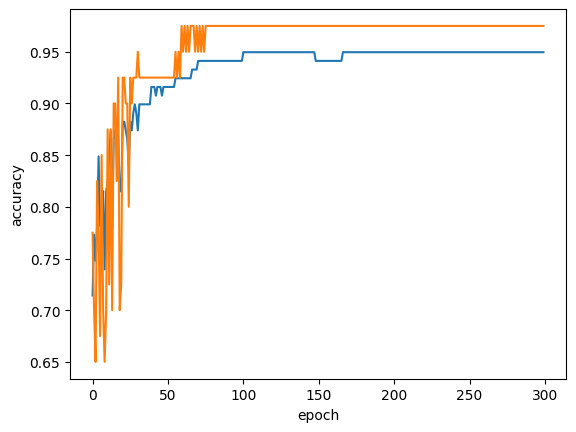

In [ ]:
import matplotlib.pyplot as plt

plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

##### 해석
- 대략 100번째 에포크 이후 훈련세트와 테스트세트간 점수가 벌어짐
- 초반에는 과소적합으로 훈련세트와 테스트세트의 점수가 모두 낮음
- 이 모델은 에포크 횟수로 100이 좋은 것으로 보여짐

### 알맞는 값으로 다시 모델 훈련
- SGDClassifier는 일정 에포크 동안 성능 향상이 없으면 자동으로 종료함
- tol: 향상될 최소값 지정. None일 경우 max_iter로 지정된 만큼 무조건 진행

In [ ]:
from sklearn.linear_model import SGDClassifier

sc = SGDClassifier(loss='log_loss',max_iter=100,tol=None,random_state=42)
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.907563025210084
0.9


##### 결과
- 과대/과소 적합도 없고 최종 점수가 좋은 것으로 보임
- 확률적 경사하강법을 기반으로 한 모델을 적용하면 점진적으로 추가 데이터를 모델에 학습할 수 있음

In [ ]:
import numpy as np

# 임의의 데이터 샘플 (x_i, y_i)
x_i = np.array([1.5, 2.0])
y_i = 3.0

# 임의의 모델 파라미터
theta = np.array([0.5, 1.0])

# 모델 예측값
y_pred = np.dot(x_i, theta)

# 평균 제곱 오차 계산
mse_i = (y_i - y_pred) ** 2

print(f"샘플 ({x_i}, {y_i})에 대한 MSE: {mse_i}")


샘플 ([1.5 2. ], 3.0)에 대한 MSE: 0.0625


In [ ]:
y_i - y_pred

0.25